In [130]:
import numpy as np
import matplotlib.pyplot as plt


Creating the quadratic loss funnction  Equation 


In [131]:
def quad_loss(x,y):
    return x**2 + 10*y**2

gradient loss function 

In [132]:
def quad_grad(x, y):
    dx = 2 *x
    dy = 20 * y
    return np.array([dx, dy])

vanilla gradient Decent 


In [133]:
def gradient_decent(grad_func,lr,epoches,start_point):
    x,y =  start_point
    path = [(x,y)]
    losses = [quad_loss(x,y)]
    for _ in range(epoches):
        grad = grad_func(x,y)
        x -=  lr*grad[0]
        y -= lr*grad[1]
        path.append((x,y))
        losses.append(quad_loss(x,y))
    return np.array(path),losses

     

RMSprop


In [134]:
def rmsprop_optimizer(grad_func, lr,beta , epsilon , epochs , start_points):
    x,y = start_points
    eg2 =  np.array([0.0,0.0])
    path = [(x,y)]
    losses = [quad_loss(x,y)]

    for _ in range(epochs):
        grad = grad_func(x,y)
        eg2 = beta * eg2 + (1 - beta) * (grad ** 2)

        x -=  lr*grad[0]/(np.sqrt(eg2[0])+epsilon)
        y -= lr*grad[1]/ (np.sqrt(eg2[1])+epsilon)
        path.append((x,y))
        losses.append(quad_loss(x,y))
    return np.array(path),losses
 

Data visulization 


In [135]:
def plot_paths(function, paths, labels, title):
    X, Y = np.meshgrid(
        np.linspace(-2, 2, 400),
        np.linspace(-2, 2, 400)
    )
    Z = function(X, Y)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='jet')

    start_plotted = False

    for path, label in zip(paths, labels):
        path = np.array(path)

        # Plot optimizer path
        plt.plot(path[:, 0], path[:, 1], linewidth=2, label=label)

        # Plot start and end only once
        if not start_plotted:
            plt.scatter(path[0, 0], path[0, 1], color="green", label="Start")
            plt.scatter(path[-1, 0], path[-1, 1], color="red", label="End")
            start_plotted = True
        else:
            plt.scatter(path[0, 0], path[0, 1], color="green")
            plt.scatter(path[-1, 0], path[-1, 1], color="red")

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()


Loss visualization 

In [136]:
def plot_losses(losses, labels, title):
    plt.figure(figsize=(8, 6))

    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)

    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


parameters

In [137]:
lr_grad = 0.05
lr_rms = 0.05
beta = 0.9 
epsilon =  1e-8 
epochs =  100 
start_point = [1.5,1.5]


rum optimizations 

In [138]:
path_gd, losses_gd = gradient_decent(quad_grad, lr_grad, epochs, start_point)
path_rmsprop, losses_rmsprop = rmsprop_optimizer(quad_grad, lr_rms, beta, epsilon,
epochs, start_point)

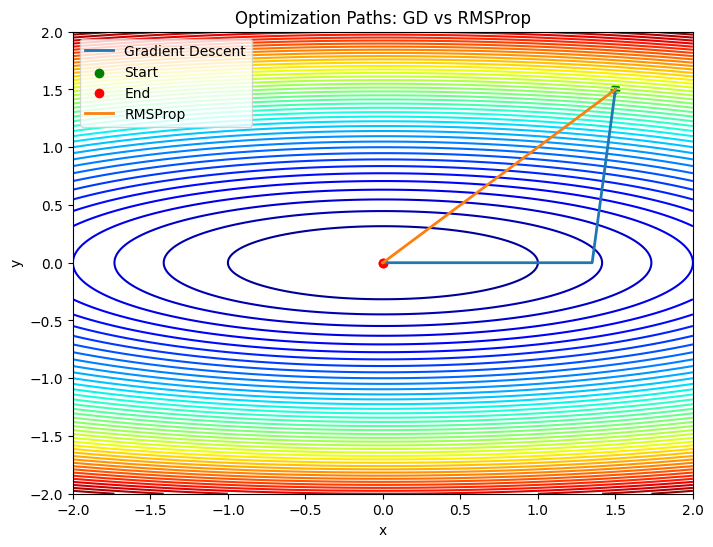

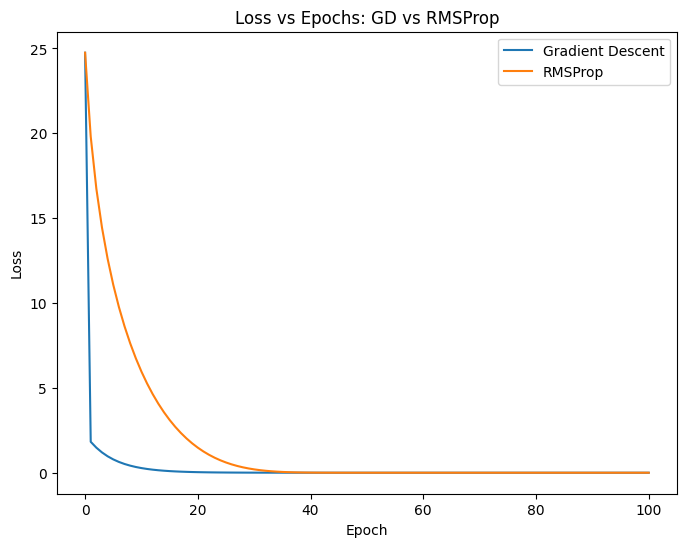

In [139]:
plot_paths(quad_loss, [path_gd, path_rmsprop],
["Gradient Descent", "RMSProp"],
"Optimization Paths: GD vs RMSProp")

plot_losses([losses_gd, losses_rmsprop],
["Gradient Descent", "RMSProp"],
"Loss vs Epochs: GD vs RMSProp")